In [1]:
from ing_theme_matplotlib import mpl_style
mpl_style(dark=True)

In [2]:
from tech_core.wqb_utils import *
plt.style.use('dark_background')

In [3]:
am = AlphaManager()

Loading Data. This code will take ~1.92 minutes to run


In [10]:
class SimpleFunction:
    def __init__(self):
        pass

    def __call__(self, ticker, row):
        close_open_return = row['close'] / row['open'] - 1
        high_low_return = row['high'] / row['low'] - 1
        low_high_return = row['low'] / row['high'] - 1

        if close_open_return * 1.05 > high_low_return:
            return -1
        elif close_open_return * 1.05 < low_high_return:
            return 1
        else:
            return 0


In [13]:
class FunctionWithMemory:
    def __init__(self):
        self.memory = Memory(window=5)
    
    def __call__(self, ticker, row):
        df = self.memory.update(ticker, row)

        close_open_return = row['close'] / row['open'] - 1
        high_low_return = row['high'] / row['low'] - 1
        low_high_return = row['low'] / row['high'] - 1

        if close_open_return * 1.05 > high_low_return:
            return -df['volume'].mean()/row['volume']
        elif close_open_return * 1.05 < low_high_return:
            return df['volume'].mean()/row['volume']
        else:
            return 0

Sharpe (no inflation): 1.8703343635041183
Sharpe (normal): 0.6542976686949041
Return to Drawdown: 5.858817056732006

Feedback
This strategy earn money even more than risk-free rate, but still not enough, try to improve it, your Sharpe is 0.6542976686949041, need to be more than 1


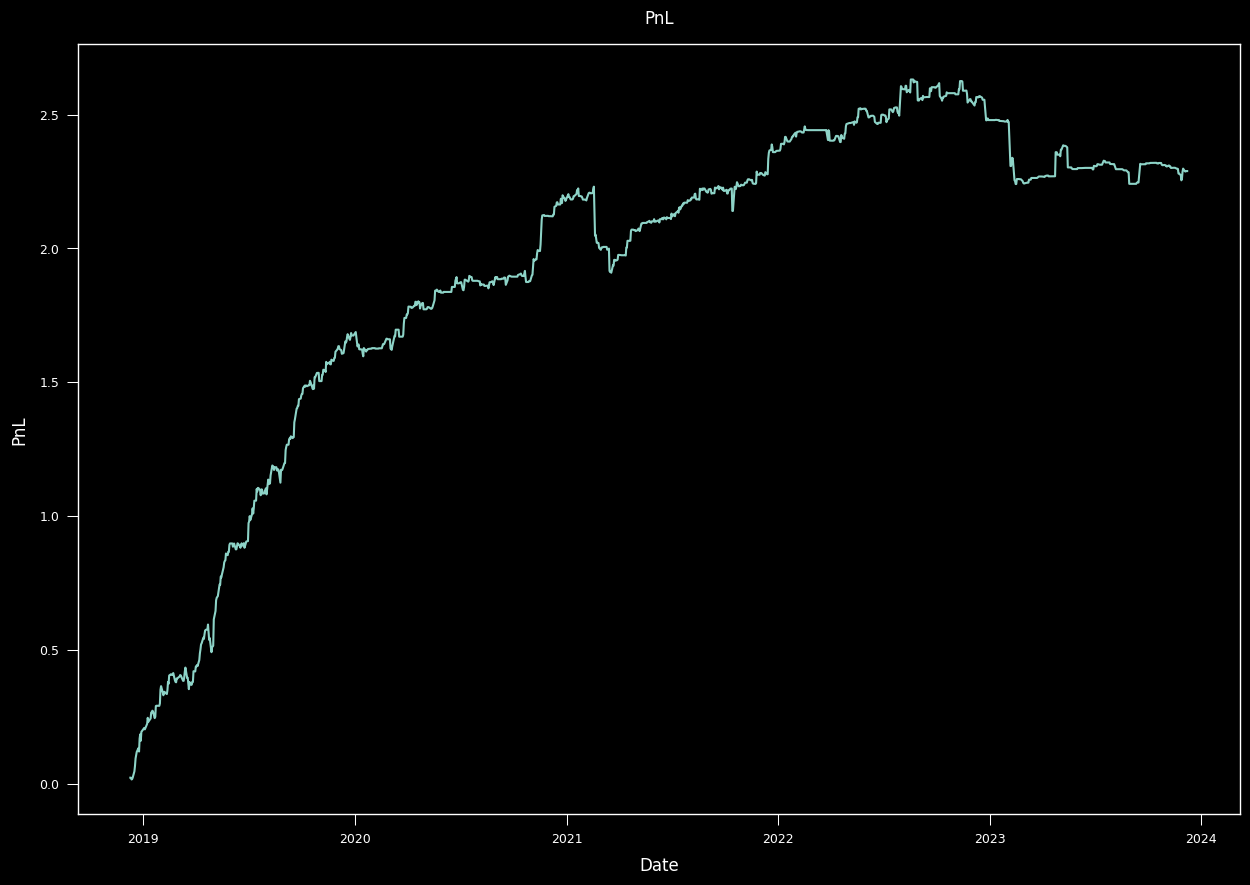

In [11]:
am.execute(Alpha('overnight', 'sector', SimpleFunction()))

Sharpe (no inflation): 1.2446421742843252
Sharpe (normal): 1.041585531967733
Return to Drawdown: 8.778083095669214

Feedback
Your strategy is good, you can try to improve it, but it is not necessary, now you can use it in real trading
Your strategy was saved to the file Simple.pkl
Watch for news about deployment, it will be added soon


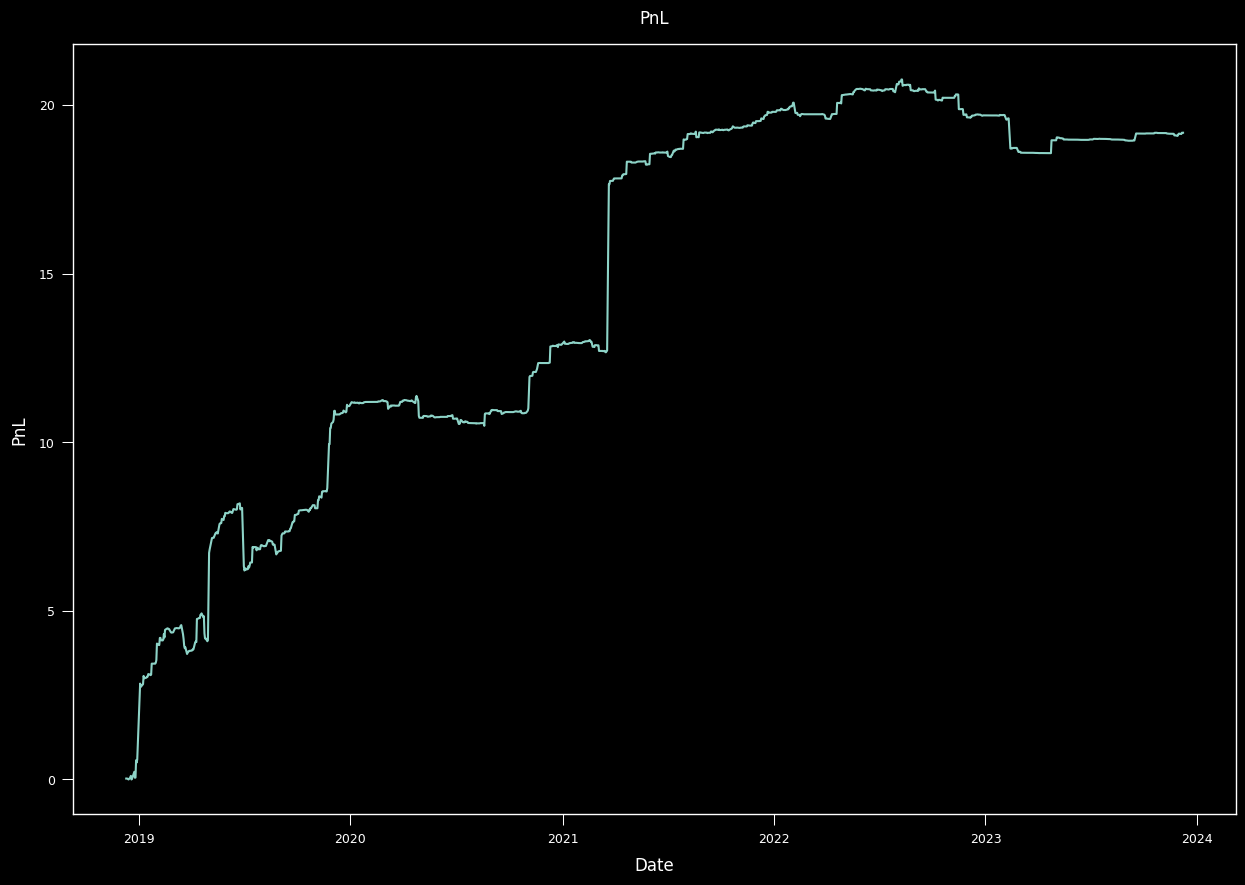

In [14]:
am.execute(Alpha('overnight', None, FunctionWithMemory()))